In [1]:
# Data Wranglers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up for Convinience
import sys
import warnings
# Order 66
%config Completer.use_jedi = False
# Ignore Warnings
warnings.filterwarnings("ignore")
# Add This Directory to Pythhon Path
sys.path.append(r"K:\Projects\vscProject\Kaggle\HousePrices")
# Increase the DataFrame Display of Columns
pd.set_option('display.max_columns', 120)

In [2]:
# This in my coustom Libr
from Script.data import data

X_train, y_train, X_test, y_samp = data()

Tokenization took: 0.00 ms
Type conversion took: 1.00 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 17.99 ms
Type conversion took: 21.99 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 8.99 ms
Type conversion took: 17.99 ms
Parser memory cleanup took: 0.00 ms


In [3]:
print(f"{X_train.shape = }")
print(f"{X_test.shape  = }")

X_train.shape = (1460, 57)
X_test.shape  = (1459, 57)


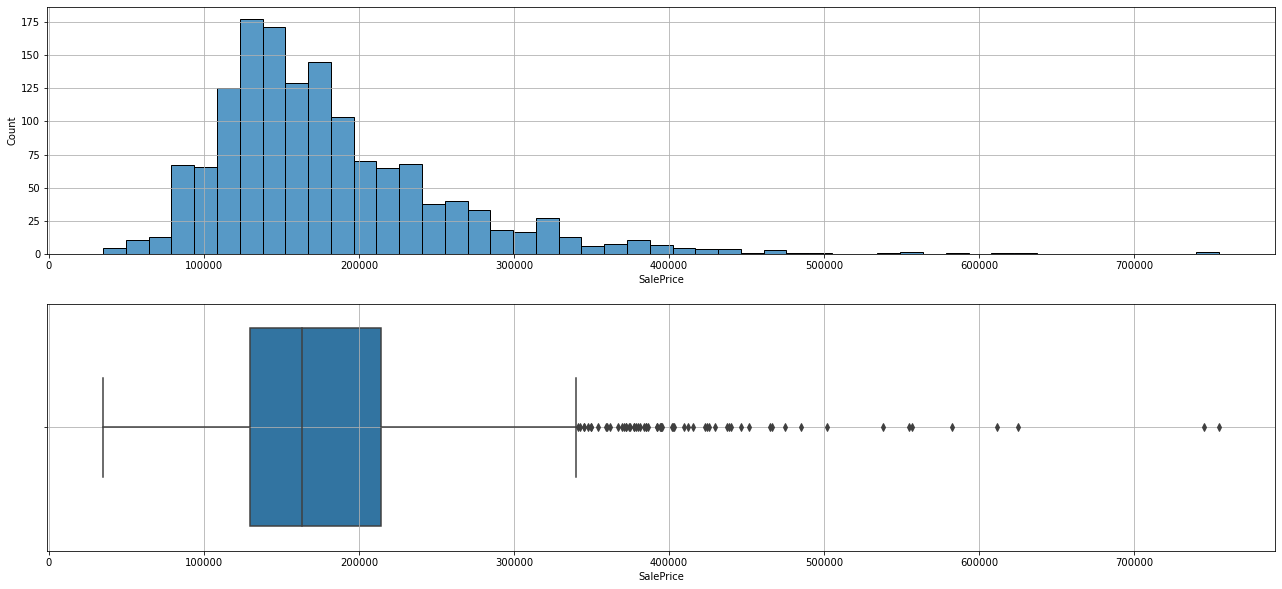

In [4]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(22,10))
sns.histplot(x=y_train, ax=ax1)
sns.boxplot(x=y_train, ax=ax2)
ax1.grid()
ax2.grid()
plt.show()

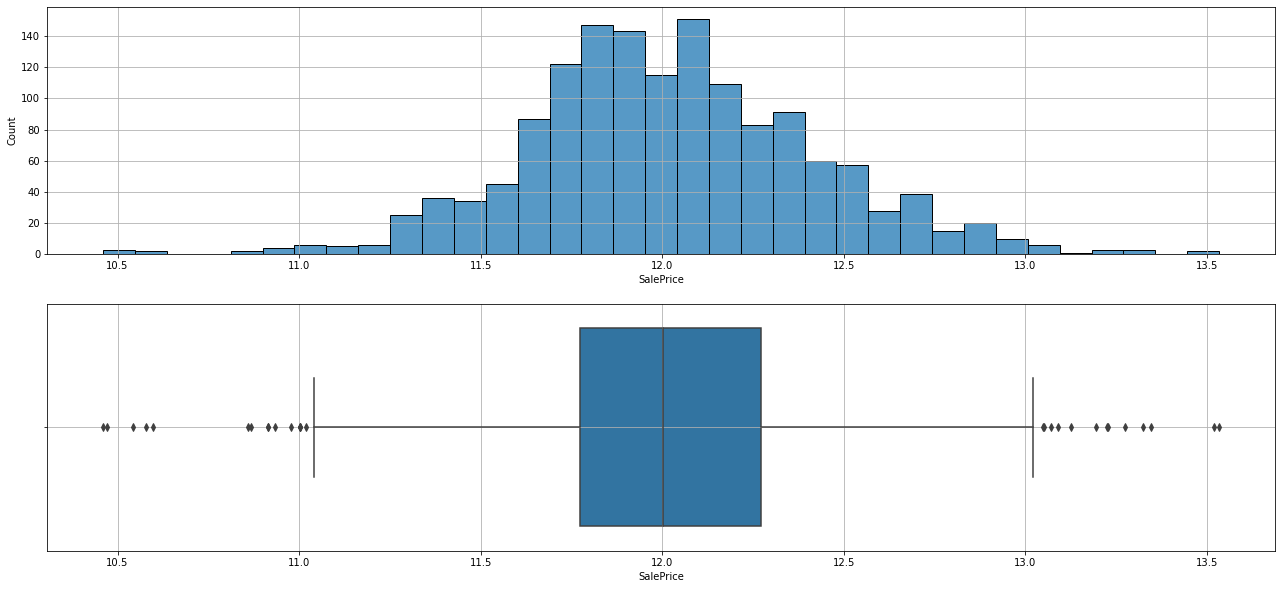

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(22,10))
sns.histplot(x=np.log(y_train), ax=ax1)
sns.boxplot(x=np.log(y_train), ax=ax2)
ax1.grid()
ax2.grid()
plt.show()

In [6]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Age_At_Sale,Remodel_Done,All_bath,Road,Age_Garage,Floors_no
0,14.0,3.0,65.0,8450.0,0.0,1.0,0.0,16.0,4.0,4.0,6.0,7.0,5.0,2003.0,1.0,11.0,4.0,2.0,196.0,2.0,5.0,2.0,0.0,5.0,706.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,8.0,7.0,0.0,1.0,5.0,2003.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2008.0,0.0,4.0,3175.0,5.0,0.0,4.0,3.0,5.0,2.0
1,11.0,3.0,80.0,9600.0,0.0,1.0,1.0,20.0,2.0,4.0,5.0,6.0,8.0,1976.0,1.0,4.0,1.0,1.0,0.0,1.0,2.0,2.0,3.0,4.0,978.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,7.0,1.0,3.0,5.0,1976.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,5.0,2007.0,0.0,4.0,3282.0,31.0,0.0,3.0,3.0,31.0,1.0
2,14.0,3.0,68.0,11250.0,1.0,1.0,0.0,16.0,4.0,4.0,6.0,7.0,5.0,2002.0,1.0,11.0,4.0,2.0,162.0,2.0,5.0,2.0,1.0,5.0,486.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6.0,7.0,1.0,3.0,5.0,2001.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,9.0,2008.0,0.0,4.0,3356.0,7.0,1.0,4.0,3.0,7.0,2.0
3,9.0,3.0,60.0,9550.0,1.0,1.0,2.0,17.0,4.0,4.0,6.0,7.0,5.0,1970.0,1.0,5.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,216.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,7.0,7.0,1.0,4.0,2.0,1998.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2006.0,0.0,1.0,3422.0,91.0,1.0,2.0,3.0,8.0,2.0
4,14.0,3.0,84.0,14260.0,1.0,1.0,1.0,24.0,4.0,4.0,6.0,8.0,5.0,2000.0,1.0,11.0,4.0,2.0,350.0,2.0,5.0,2.0,2.0,5.0,655.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,9.0,7.0,1.0,3.0,5.0,2000.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,12.0,2008.0,0.0,4.0,4455.0,8.0,0.0,4.0,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,14.0,3.0,62.0,7917.0,0.0,1.0,0.0,14.0,4.0,4.0,6.0,6.0,5.0,2000.0,1.0,11.0,4.0,1.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,7.0,7.0,1.0,3.0,5.0,1999.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,8.0,2007.0,0.0,4.0,3100.0,8.0,1.0,3.0,3.0,8.0,2.0
1456,11.0,3.0,85.0,13175.0,0.0,1.0,0.0,13.0,4.0,4.0,5.0,6.0,6.0,1988.0,1.0,9.0,2.0,3.0,119.0,1.0,2.0,2.0,0.0,4.0,790.0,2.0,2.0,1.0,1.0,0.0,3.0,1.0,7.0,6.0,2.0,3.0,5.0,1978.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2010.0,0.0,4.0,4464.0,32.0,1.0,3.0,3.0,32.0,1.0
1457,9.0,3.0,66.0,9042.0,0.0,1.0,0.0,17.0,4.0,4.0,6.0,7.0,9.0,2006.0,1.0,12.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0,5.0,275.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,9.0,7.0,2.0,4.0,5.0,1941.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2500.0,5.0,2010.0,0.0,4.0,3804.0,69.0,1.0,2.0,3.0,69.0,2.0
1458,11.0,3.0,68.0,9717.0,0.0,1.0,0.0,10.0,4.0,4.0,5.0,5.0,6.0,1996.0,4.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,5.0,49.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,5.0,7.0,0.0,1.0,5.0,1950.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,4.0,2010.0,0.0,4.0,2874.0,60.0,1.0,2.0,3.0,60.0,1.0


# Model Building

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_log_error, make_scorer

# My Custom Mertric Function
def root_mean_squared_log_error(y_true, y_pred):
    rmsle = mean_squared_log_error(y_true, y_pred)
    return np.sqrt(rmsle)

# My Custom SkLearn Scorer
RMSLE = make_scorer(root_mean_squared_log_error, greater_is_better=False)

# Automate CrossValidation Scoring
def perform_cv(model, verbose=0, **model_params) -> float:
    # Load model with params
    model_loaded = model(**model_params)
    # Set CrossValidation logic
    cv    = KFold(n_splits=5,shuffle=True,random_state=54234)
    # perform cross validation scoring
    score_list = cross_val_score(model_loaded,X_train,y_train,cv=cv,verbose=verbose,scoring='neg_root_mean_squared_error')
    score      = score_list.mean()
    print(f"{score = }")
    return score_list

## Base Model

In [8]:
from xgboost import XGBRegressor

In [9]:
_ = perform_cv(XGBRegressor)

score = -29216.295691376297


## Perform Optuna Optimization

In [10]:
import optuna
from optuna.importance import get_param_importances

In [11]:
def objective(trial):
    # Optuna Governed Param Dict For XGB Model
    param_dict = {
        'n_estimators'     : trial.suggest_int('n_estimators', 50, 2000),
        'learning_rate'    : trial.suggest_float('learning_rate', 0.0001, 0.1, log=True),
        'max_depth'        : trial.suggest_int('max_depth', 3, 40),
        'subsample'        : trial.suggest_categorical('subsample', np.arange(20, 200, 20)/200),
        'colsample_bytree' : trial.suggest_categorical('colsample_bytree', np.arange(20, 200, 20)/200),
        'verbosity'        : 1,
        'n_jobs'           : -2,
        'random_state'     : 0,
    }
    # The regr Model
    model = XGBRegressor(**param_dict)
    # Set CrossValidation logic
    cv    = KFold(n_splits=5, shuffle=True, random_state=54234)
    # Evaluate the Model.
    score_list = cross_val_score(model, X_train, y_train, cv=cv, verbose=0, scoring='neg_root_mean_squared_error').mean()
    return score_list

In [12]:
Study = optuna.create_study(study_name="First Study", direction='maximize')

[I 2021-09-02 01:12:23,323] A new study created in memory with name: First Study


In [13]:
Study.optimize(objective, n_trials=500, timeout=5*3600)

[I 2021-09-02 01:14:48,093] Trial 0 finished with value: -25034.434730406276 and parameters: {'n_estimators': 1258, 'learning_rate': 0.03906890724211553, 'max_depth': 36, 'subsample': 0.8, 'colsample_bytree': 0.3}. Best is trial 0 with value: -25034.434730406276.
[I 2021-09-02 01:14:56,701] Trial 1 finished with value: -109166.08507142235 and parameters: {'n_estimators': 338, 'learning_rate': 0.001923790214254724, 'max_depth': 25, 'subsample': 0.5, 'colsample_bytree': 0.8}. Best is trial 0 with value: -25034.434730406276.
[I 2021-09-02 01:15:03,456] Trial 2 finished with value: -151713.986900961 and parameters: {'n_estimators': 532, 'learning_rate': 0.0005567984205676751, 'max_depth': 27, 'subsample': 0.5, 'colsample_bytree': 0.1}. Best is trial 0 with value: -25034.434730406276.
[I 2021-09-02 01:15:14,578] Trial 3 finished with value: -26706.944735999907 and parameters: {'n_estimators': 1074, 'learning_rate': 0.0189347874634904, 'max_depth': 3, 'subsample': 0.1, 'colsample_bytree': 0.

In [14]:
Study.best_params

{'n_estimators': 1176,
 'learning_rate': 0.03506076234688099,
 'max_depth': 4,
 'subsample': 0.9,
 'colsample_bytree': 0.2}

In [15]:
get_param_importances(Study)

OrderedDict([('learning_rate', 0.6457678384024341),
             ('n_estimators', 0.33958879295473304),
             ('subsample', 0.010993145415346961),
             ('colsample_bytree', 0.002031134558849735),
             ('max_depth', 0.00161908866863608)])

In [16]:
from collections import ChainMap
fixed_dict = {'verbosity': 1, 'n_jobs': -2, 'random_state': 0,}
dict_all   = ChainMap(Study.best_params, fixed_dict)

best_model = XGBRegressor(**dict_all)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03506076234688099, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1176, n_jobs=-2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [17]:
y_pred = best_model.predict(X_test)

In [18]:
def my_sub(y_pred: np.ndarray, file_name: str) -> None:
    y_samp.SalePrice = y_pred
    path_0 = "../Sub/"
    path_1 = ".csv"
    full_path = path_0 + file_name + path_1
    y_samp.astype(np.int64).to_csv(full_path, index=False)

In [19]:
my_sub(y_pred, 'Z_Model')